# Thumys human spatial atlas, Adding past annotations
This notebook was used to load the raw single cell object and add the annotations from the previous Park 2020 and Sue 2023 projects. 

Author - Nadav Yayon, 2023

In [1]:
# fine annotate lineage 
import scanpy as sc
import numpy as np
import pandas as pd
import scvi
import seaborn as sns
import os,sys
#import mudata
import anndata

import scvi

#import multi_view_atlas as mva
sc.logging.print_header()


Global seed set to 0


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.3 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


In [2]:
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 150, vector_friendly = True, format = 'pdf')

# cobine annotations from previuos work annotate every lineage

# load primal objects of our atlas pre QC

In [3]:
# load full object 
adata_full = sc.read_h5ad('')
adata_full

AnnData object with n_obs × n_vars = 655712 × 36751
    obs: 'n_genes', 'sample_barcode', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_r

# migrate annotations 

AnnData object with n_obs × n_vars = 255901 × 32922
    obs: 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'Sample', 'n_counts', 'n_genes', 'donor_id', 'sort', 'method', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'cell_type_ontology_term_id_colors', 'schema_version', 'title'
    obsm: 'X_umap'
Found - 149438 cells overlapping!


/tmp/ipykernel_4085/1826813122.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_park_overlap.obs['park_2020_index'] = park_in_full_index.index
/home/jovyan/my-conda-envs/scvi-env/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


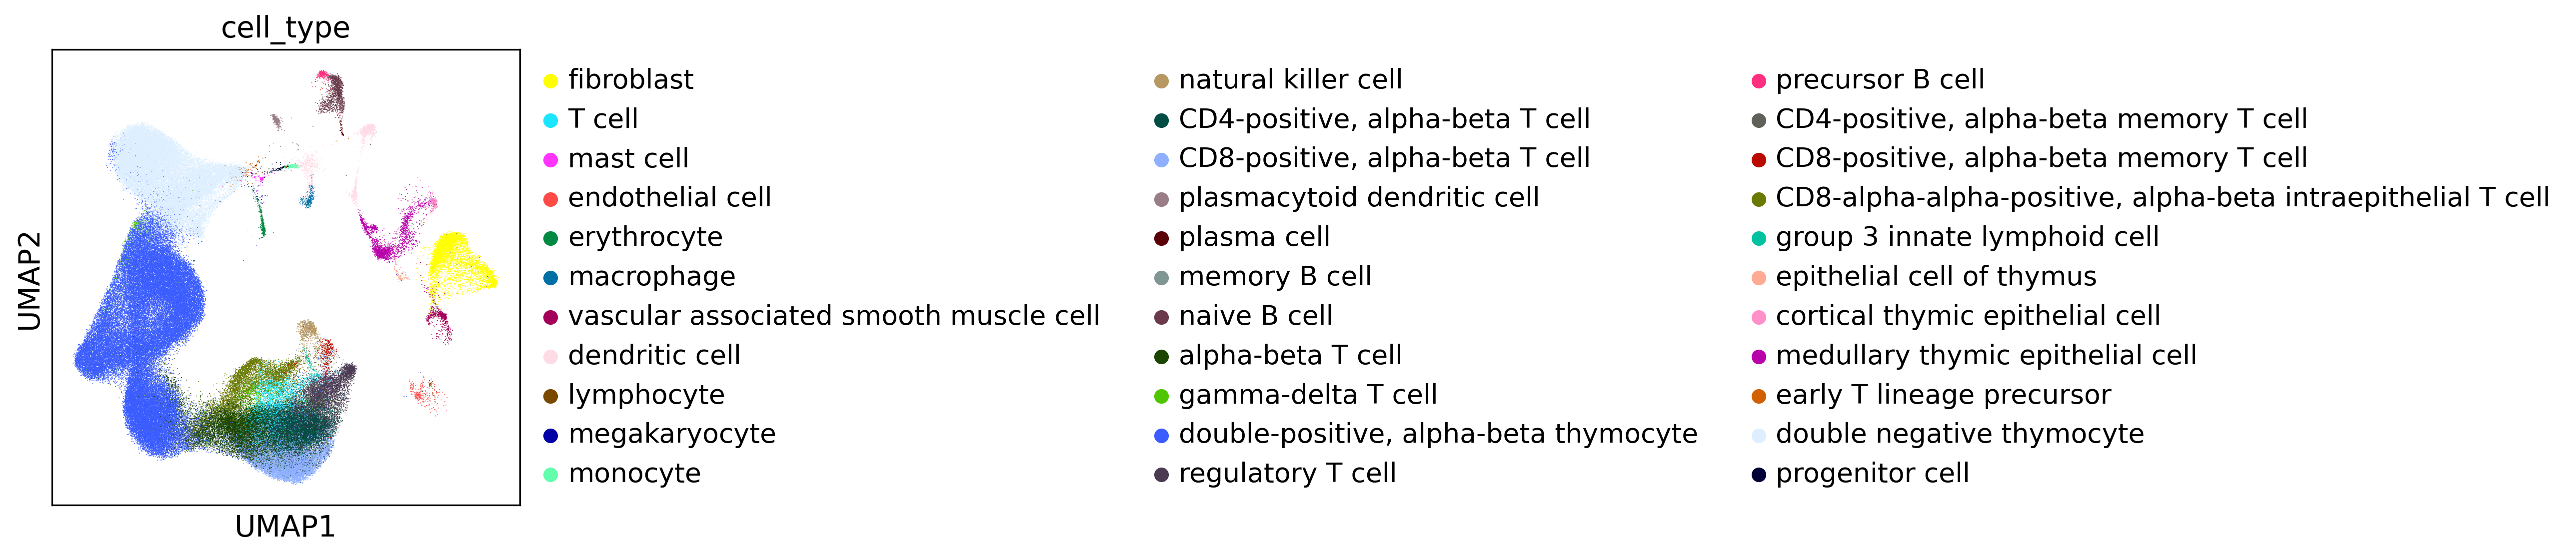

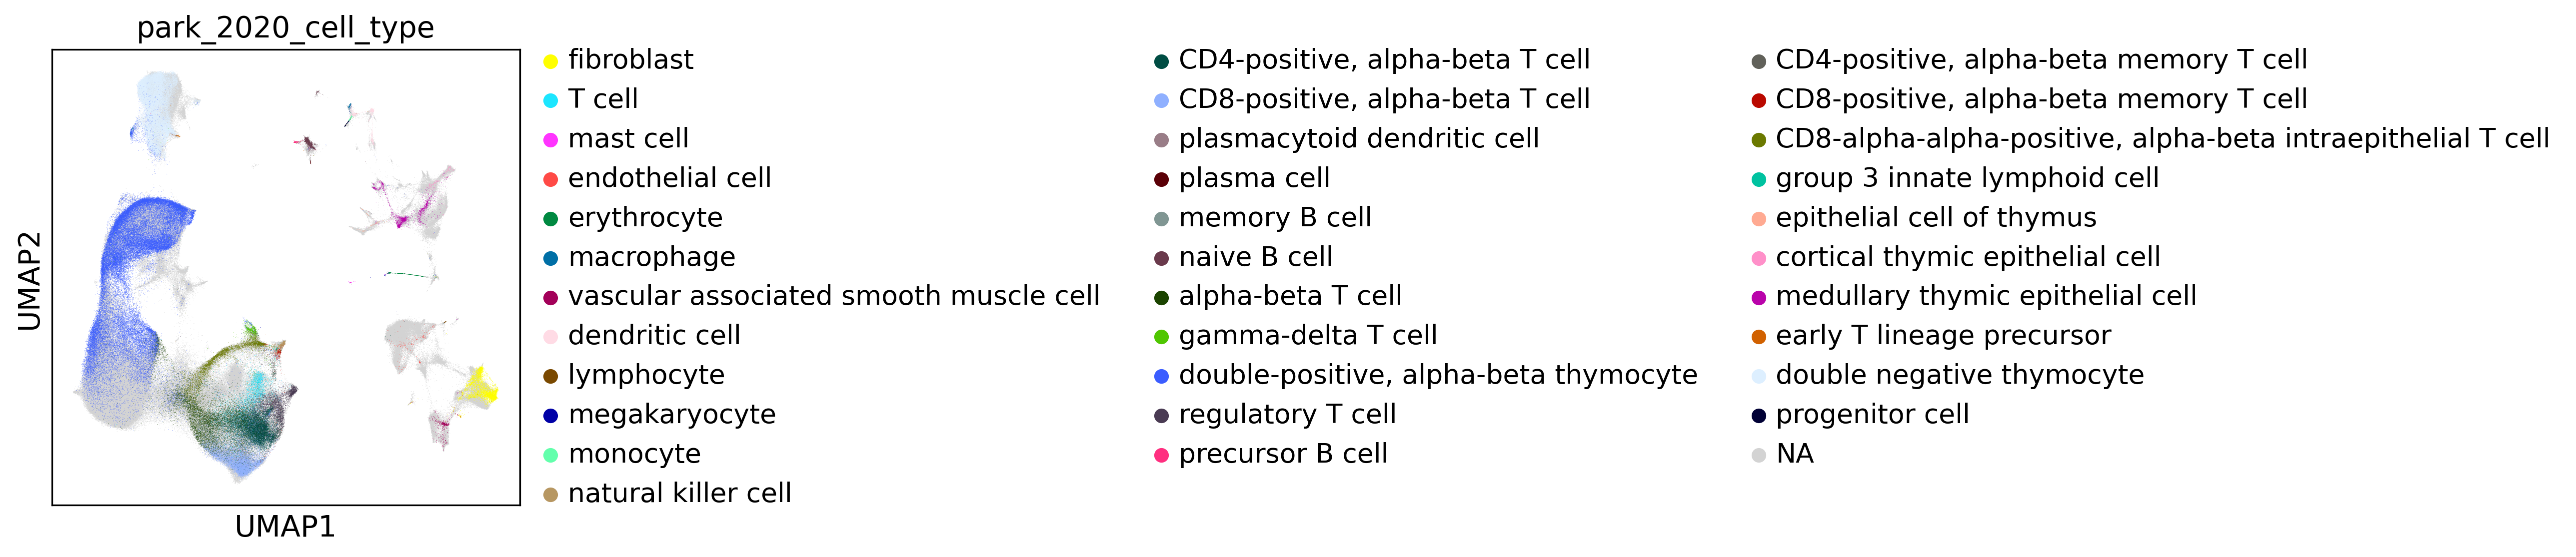

In [5]:
# load park 2020 
adata_park = sc.read_h5ad('')
print(adata_park)


# fix panfetal object and remove cells that are less than 5, the map annotations to large object 
park_in_full_index = pd.DataFrame(adata_full.obs['sample_barcode'][adata_full.obs['sample_barcode'].isin(adata_park.obs.index)])

print('Found - '+str(len(park_in_full_index))+' cells overlapping!')
park_in_full_index['htsa_index'] =  park_in_full_index.index
park_in_full_index.set_index(keys='sample_barcode',inplace=True)
adata_park_overlap = adata_park[park_in_full_index.index]
adata_park_overlap.obs['park_2020_index'] = park_in_full_index.index
adata_park_overlap.obs['htsa_index'] = park_in_full_index['htsa_index']
adata_park_overlap.obs.set_index(keys='htsa_index',inplace=True)
to_keep = list(adata_park_overlap.obs['cell_type'].value_counts()[adata_park_overlap.obs['cell_type'].value_counts() >= 5].index)
adata_park_overlap = adata_park_overlap[adata_park_overlap.obs['cell_type'].isin(to_keep)]

# plot clean object 
sc.pl.umap(adata_park_overlap,color='cell_type')
adata_full.obs['park_2020_cell_type'] = adata_park_overlap.obs['cell_type']
adata_full.uns['park_2020_cell_type_colors'] = adata_park_overlap.uns['cell_type_colors']
# plot in merged object 
sc.pl.umap(adata_full,color=['park_2020_cell_type'],ncols=1)

# clean up 
del adata_park
adata_park_overlap.write_h5ad('')
del adata_park_overlap


AnnData object with n_obs × n_vars = 108615 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation'
    var: 'GeneID', 'GeneName', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'scvi_model_var'
    uns: 'leiden', 'scvi', 'umap'
    obsm: 'X_scvi', 'X_umap'
    obsp: 'scvi_connectivities', 'scvi_distances'
Found - 96924 cells overlapping!


/tmp/ipykernel_4085/2860457810.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_panfetal_overlap.obs['panfetal_index'] = panfetal_thymus_in_full_index.index
/home/jovyan/my-conda-envs/scvi-env/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


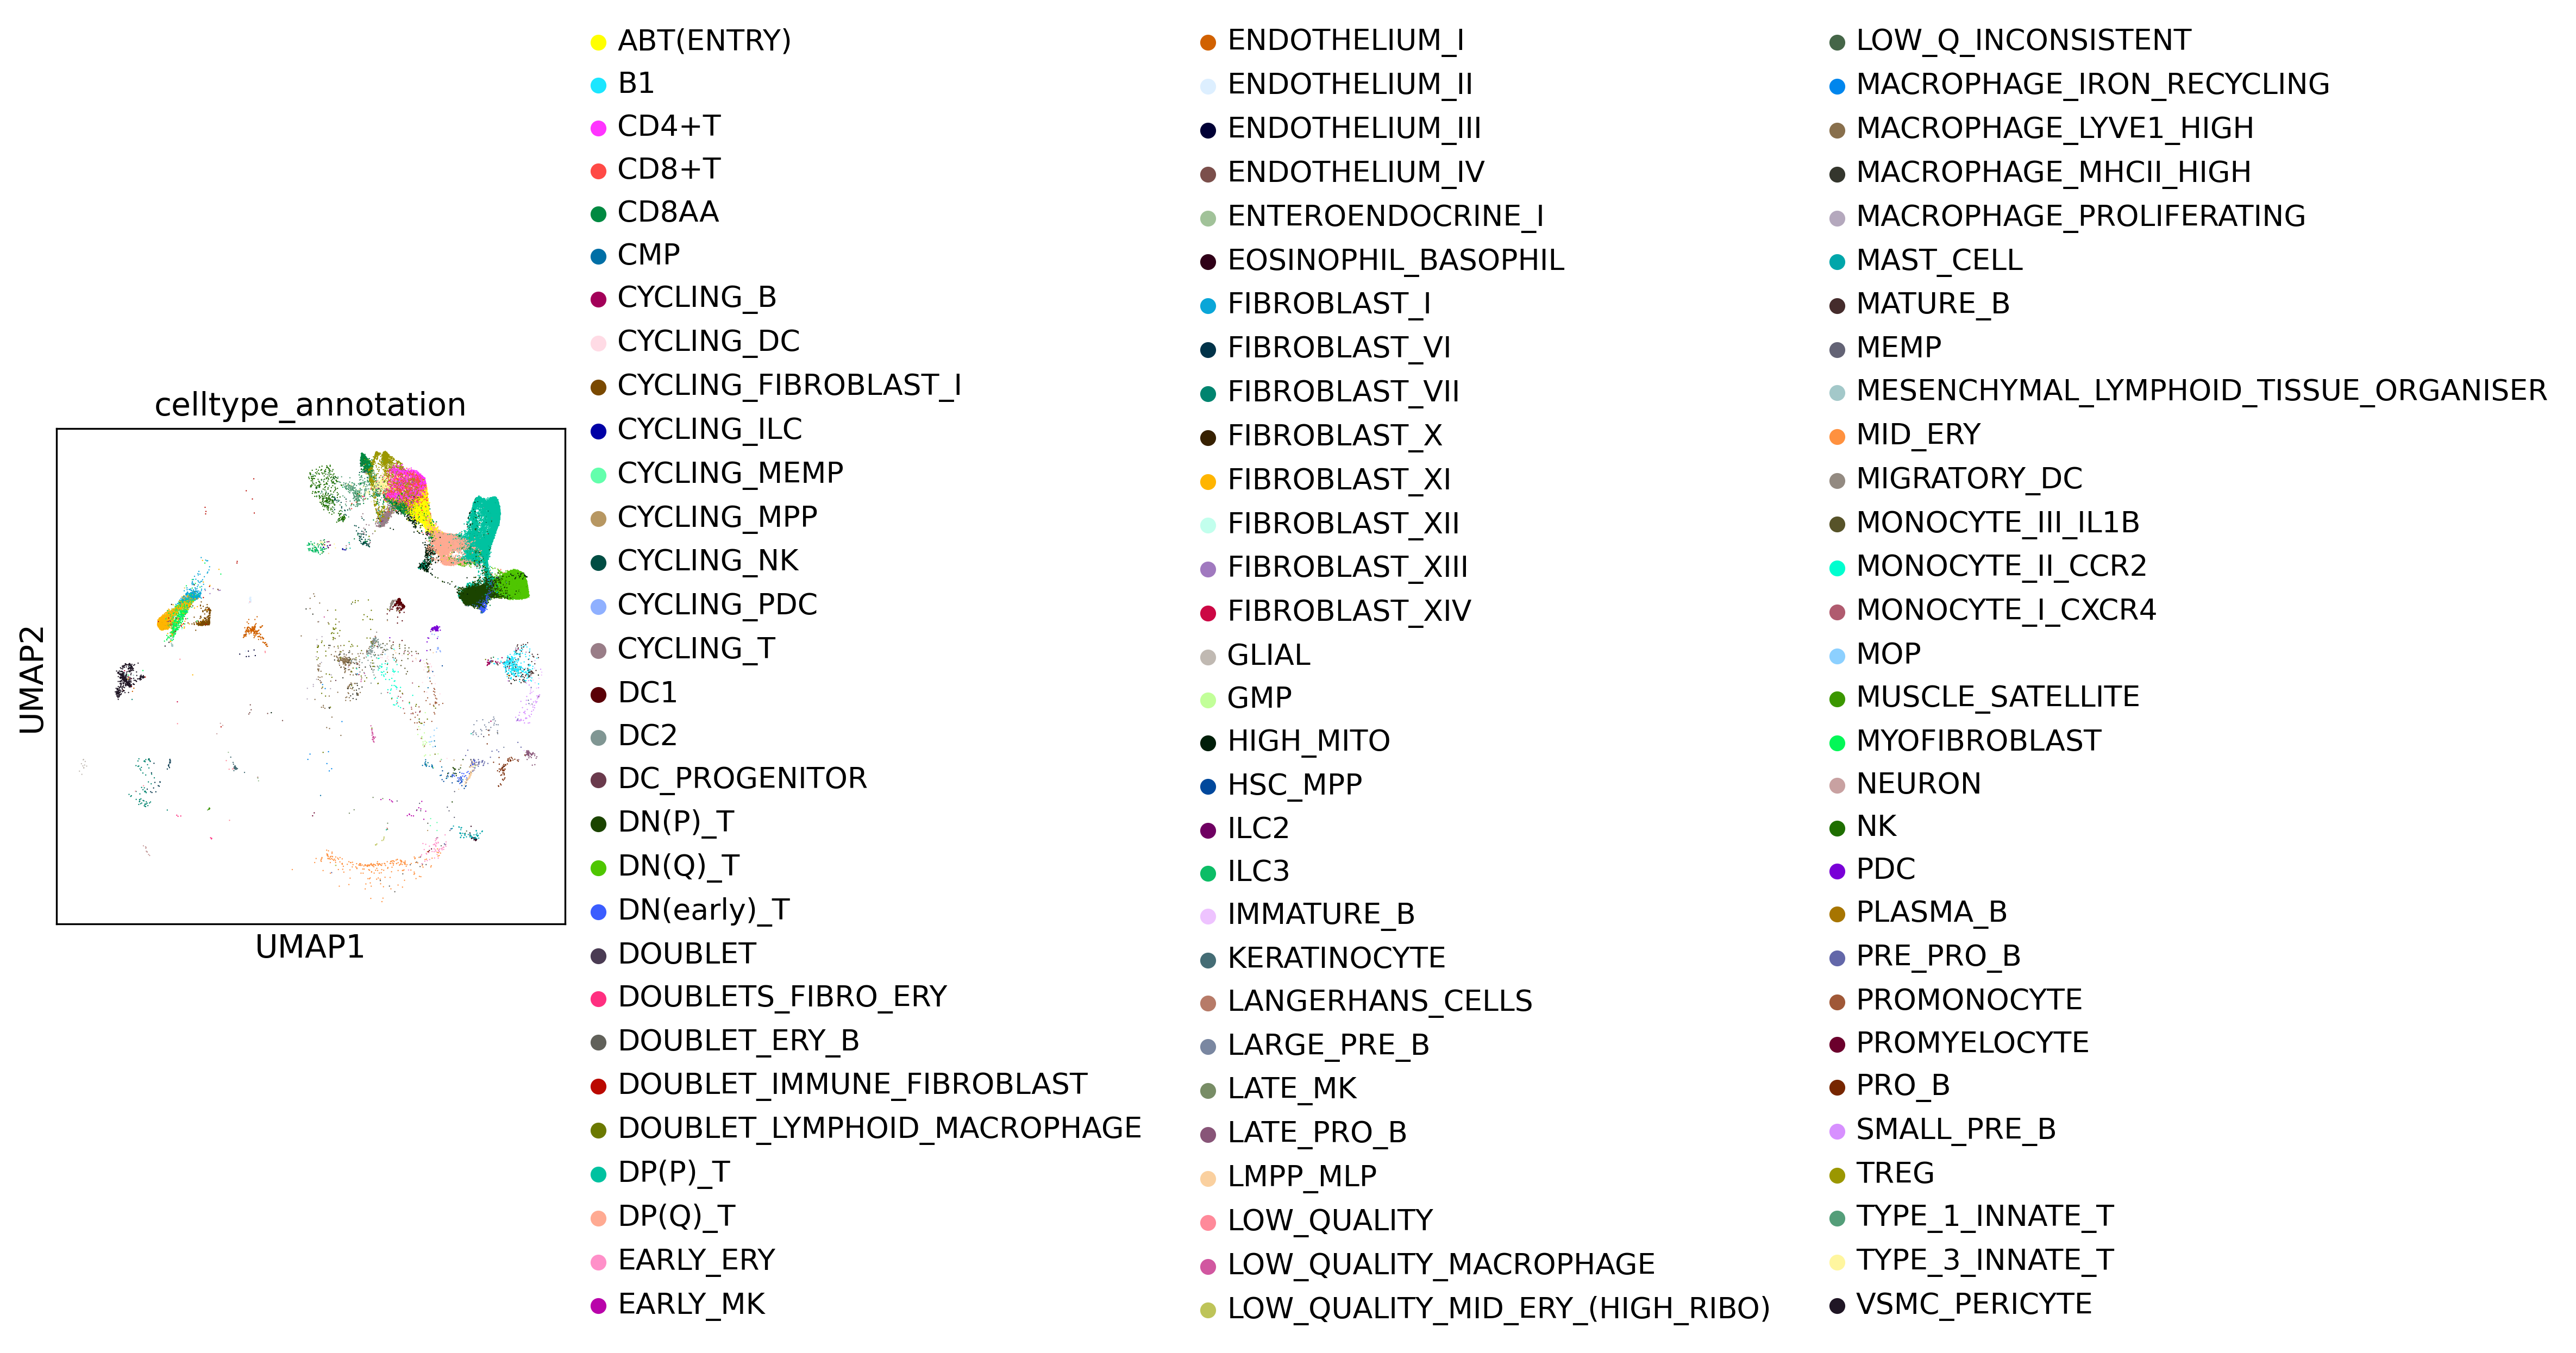

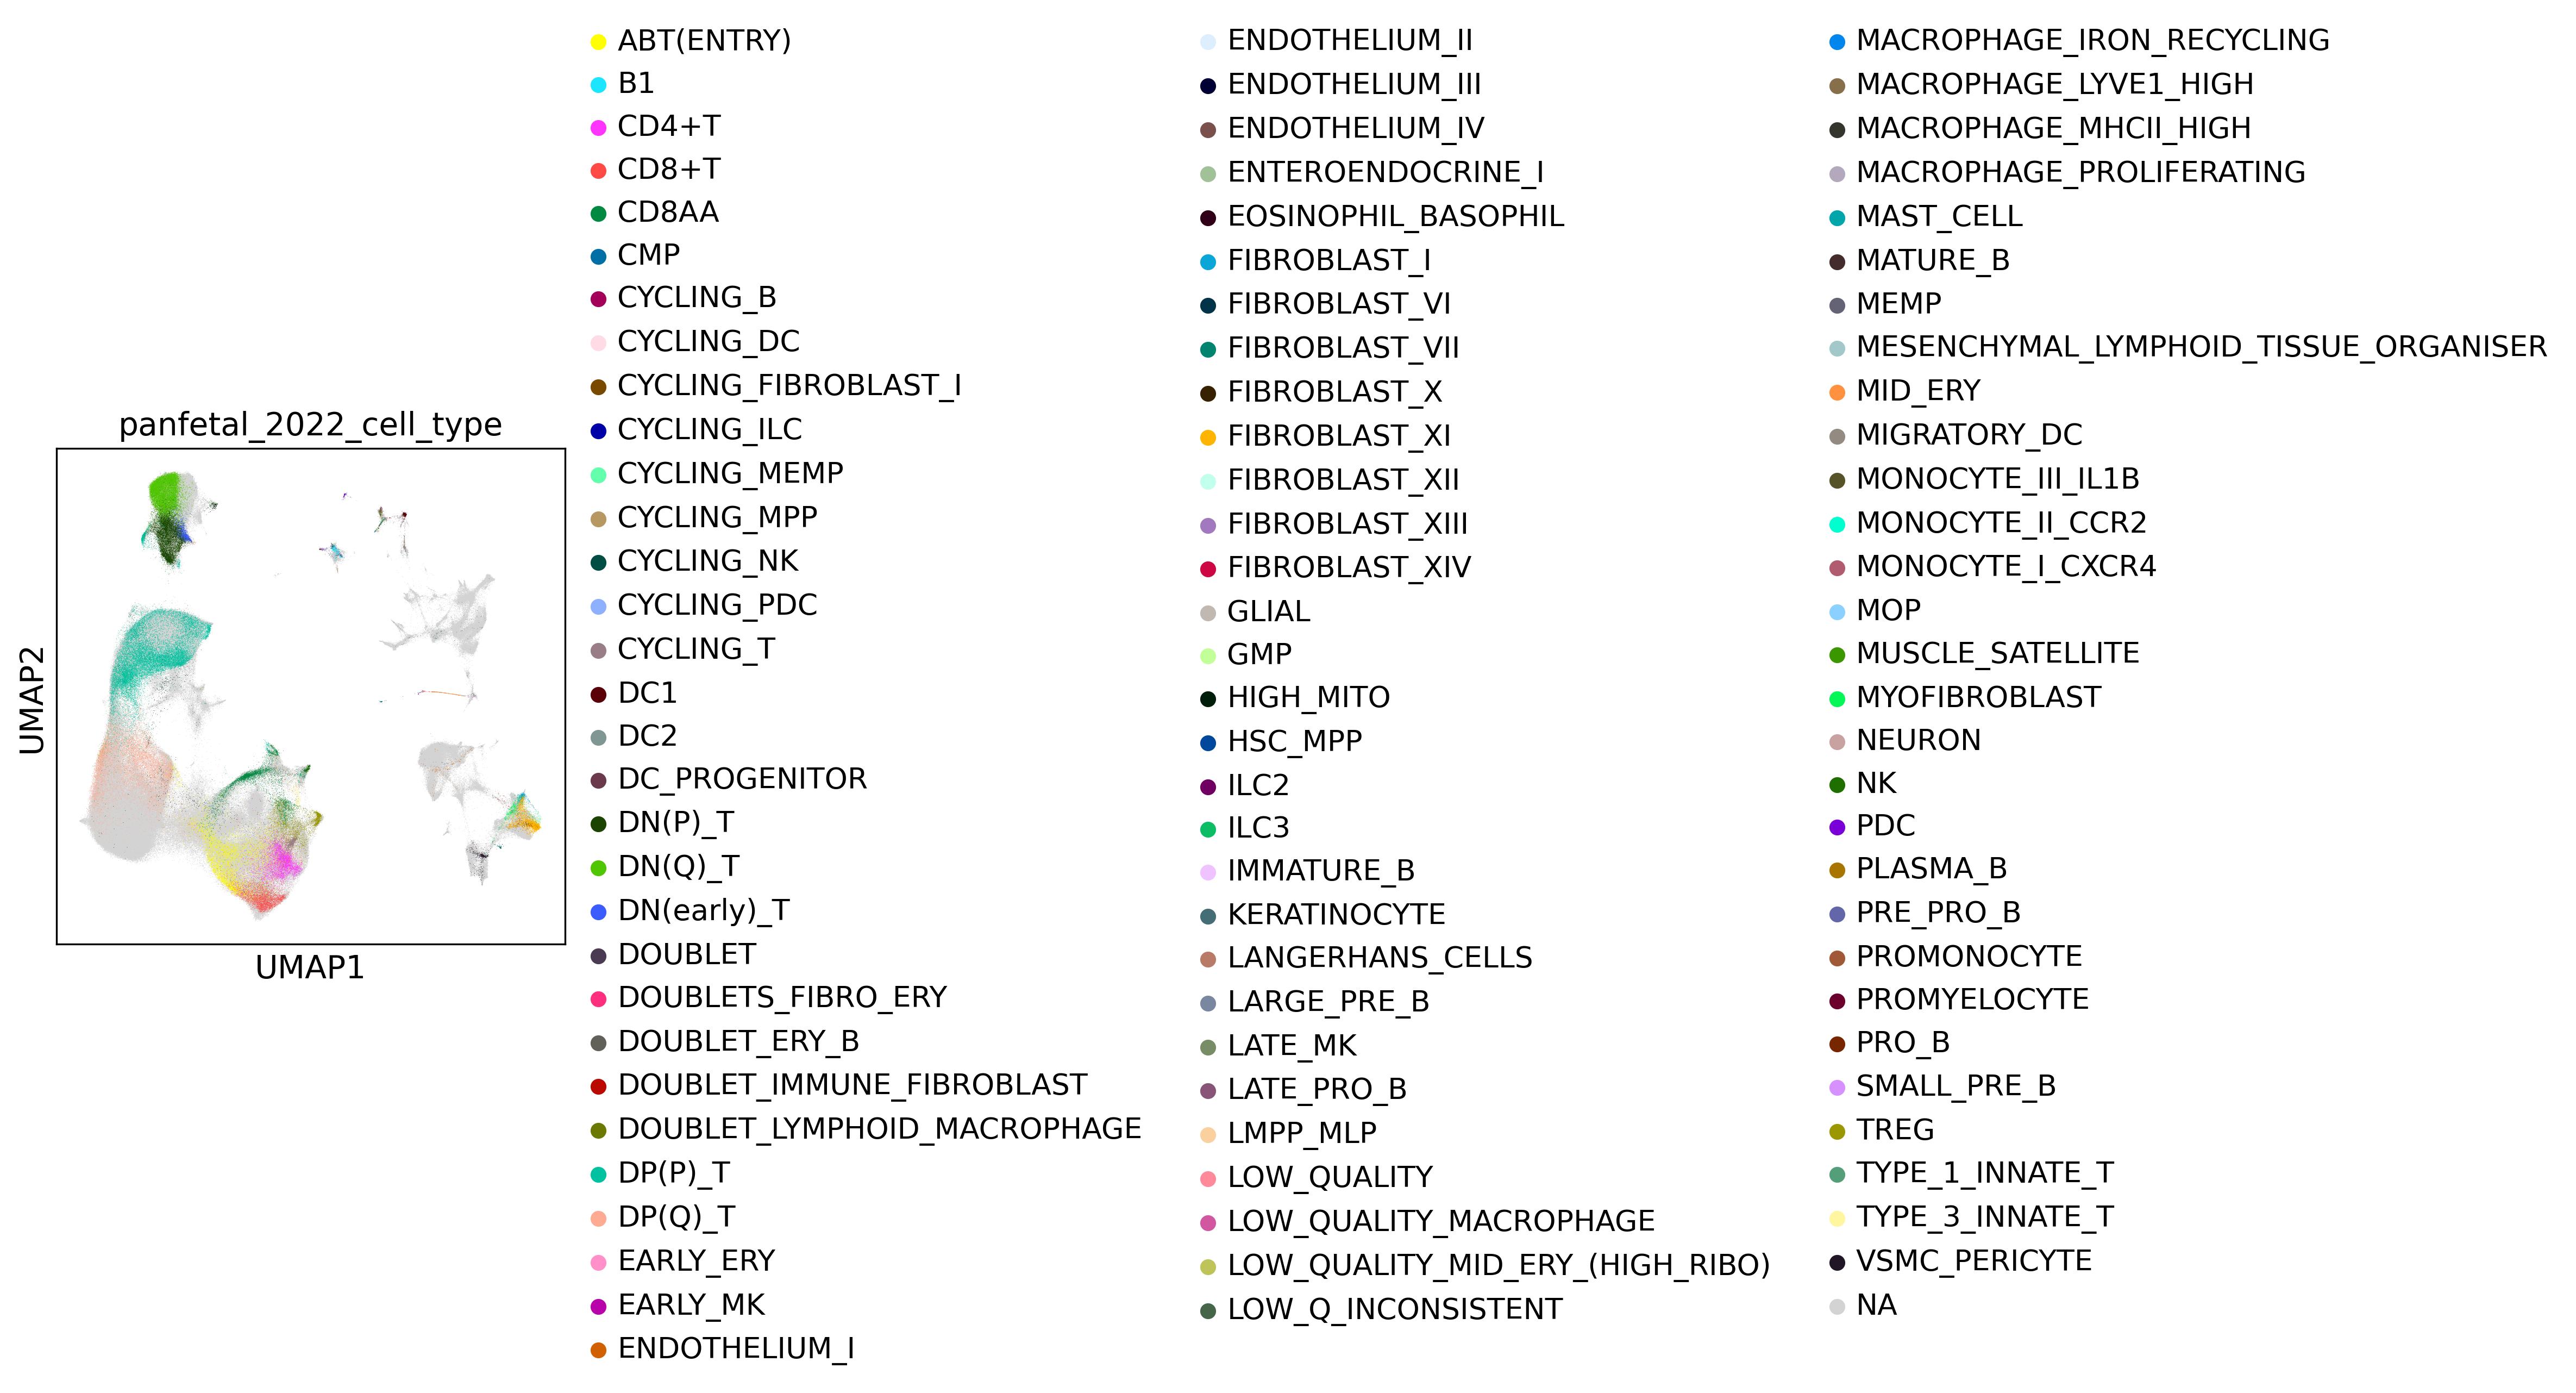

In [6]:
# load panfetal immune (Sue and Dann et al 2022) 
adata_panfetal_thymus = sc.read_h5ad('')
print(adata_panfetal_thymus)

# fix panfetal object and remove cells that are less than 5, the map annotations to large object 
panfetal_thymus_in_full_index = pd.DataFrame(adata_full.obs['sample_barcode'][adata_full.obs['sample_barcode'].isin(adata_panfetal_thymus.obs.index)])

print('Found - '+str(len(panfetal_thymus_in_full_index))+' cells overlapping!')
panfetal_thymus_in_full_index['htsa_index'] =  panfetal_thymus_in_full_index.index
panfetal_thymus_in_full_index.set_index(keys='sample_barcode',inplace=True)
adata_panfetal_overlap = adata_panfetal_thymus[panfetal_thymus_in_full_index.index]
adata_panfetal_overlap.obs['panfetal_index'] = panfetal_thymus_in_full_index.index
adata_panfetal_overlap.obs['htsa_index'] = panfetal_thymus_in_full_index['htsa_index']
adata_panfetal_overlap.obs.set_index(keys='htsa_index',inplace=True)
to_keep = list(adata_panfetal_overlap.obs['celltype_annotation'].value_counts()[adata_panfetal_overlap.obs['celltype_annotation'].value_counts() >= 5].index)
adata_panfetal_overlap = adata_panfetal_overlap[adata_panfetal_overlap.obs['celltype_annotation'].isin(to_keep)]

# plot clean object 
sc.pl.umap(adata_panfetal_overlap,color='celltype_annotation')
adata_full.obs['panfetal_2022_cell_type'] = adata_panfetal_overlap.obs['celltype_annotation']
adata_full.uns['panfetal_2022_cell_type_colors'] = adata_panfetal_overlap.uns['celltype_annotation_colors']
# plot in merged object 
sc.pl.umap(adata_full,color=['panfetal_2022_cell_type'],ncols=1)

# clean up 
del adata_panfetal_thymus
adata_panfetal_overlap.write_h5ad('')
del adata_panfetal_overlap

In [7]:
adata_full.write_h5ad('')


In [ ]:
# add the most updated CITEseq annotations as well 

In [8]:
h5ad_file = ''
adata_paed = sc.read_h5ad(h5ad_file)
adata_paed.obs = adata_paed.obs.set_index(keys='backup_barcode')
adata_paed

AnnData object with n_obs × n_vars = 345609 × 36751
    obs: 'n_genes', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spl

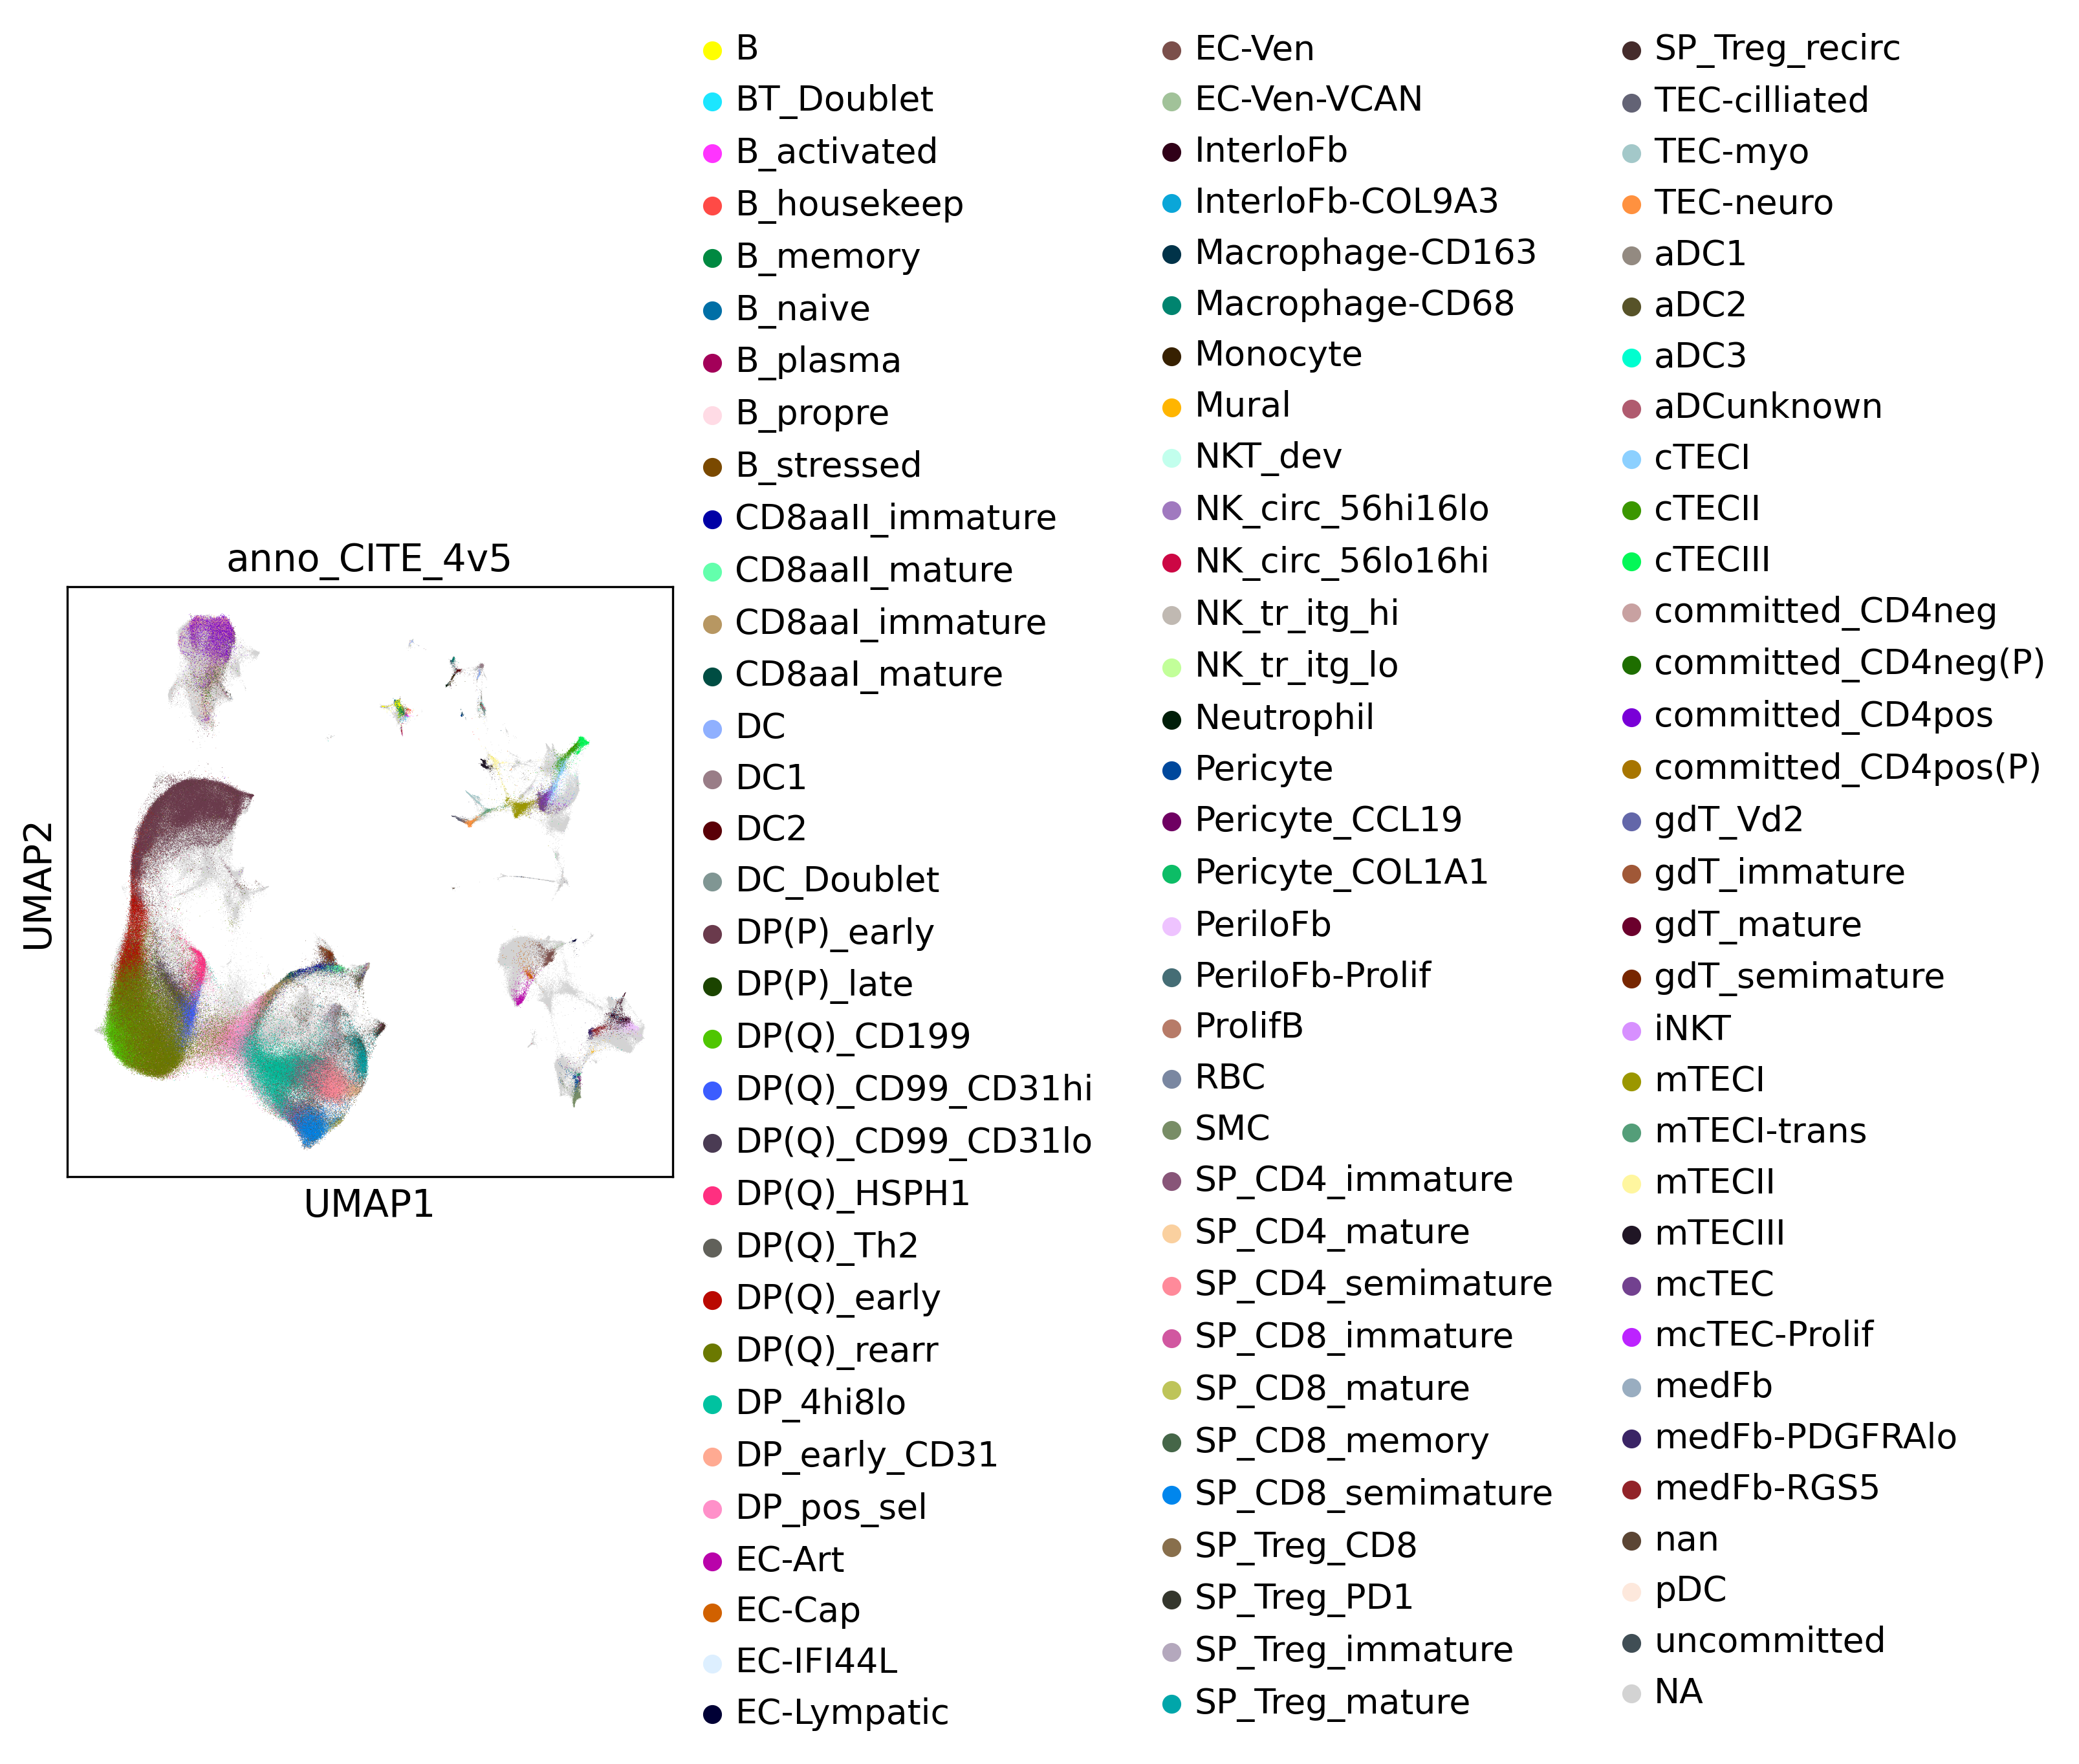

In [9]:
adata_full.obs['anno_CITE_4v5'] = adata_paed.obs['anno_CITE_4v5'] 
sc.pl.umap(adata_full,color=['anno_CITE_4v5'],ncols=1)

In [11]:
adata_full.write_h5ad('')
